<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#概要" data-toc-modified-id="概要-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>概要</a></span></li><li><span><a href="#pythonの標準関数による解法" data-toc-modified-id="pythonの標準関数による解法-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>pythonの標準関数による解法</a></span></li><li><span><a href="#二分法とNewton法の原理" data-toc-modified-id="二分法とNewton法の原理-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>二分法とNewton法の原理</a></span><ul class="toc-item"><li><span><a href="#二分法(bisection)" data-toc-modified-id="二分法(bisection)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>二分法(bisection)</a></span></li><li><span><a href="#Newton法(あるいはNewton-Raphson法)" data-toc-modified-id="Newton法(あるいはNewton-Raphson法)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Newton法(あるいはNewton-Raphson法)</a></span></li></ul></li><li><span><a href="#二分法とNewton法のコード" data-toc-modified-id="二分法とNewton法のコード-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>二分法とNewton法のコード</a></span><ul class="toc-item"><li><span><a href="#二分法(bisection)" data-toc-modified-id="二分法(bisection)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>二分法(bisection)</a></span></li><li><span><a href="#Newton法(あるいはNewton-Raphson法)" data-toc-modified-id="Newton法(あるいはNewton-Raphson法)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Newton法(あるいはNewton-Raphson法)</a></span></li></ul></li><li><span><a href="#収束性と安定性" data-toc-modified-id="収束性と安定性-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>収束性と安定性</a></span></li><li><span><a href="#収束判定条件" data-toc-modified-id="収束判定条件-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>収束判定条件</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#$\epsilon,-\delta$を説明するための図" data-toc-modified-id="$\epsilon,-\delta$を説明するための図-6.0.0.1"><span class="toc-item-num">6.0.0.1&nbsp;&nbsp;</span>$\epsilon, \delta$を説明するための図</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#2変数関数の場合" data-toc-modified-id="2変数関数の場合-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>2変数関数の場合</a></span></li><li><span><a href="#2020年度課題(中筋さんありがとう)" data-toc-modified-id="2020年度課題(中筋さんありがとう)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>2020年度課題(中筋さんありがとう)</a></span></li><li><span><a href="#例題:二分法とNewton法の収束性" data-toc-modified-id="例題:二分法とNewton法の収束性-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>例題:二分法とNewton法の収束性</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#解答例" data-toc-modified-id="解答例-9.0.1"><span class="toc-item-num">9.0.1&nbsp;&nbsp;</span>解答例</a></span></li></ul></li><li><span><a href="#exp関数に関する注意" data-toc-modified-id="exp関数に関する注意-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>exp関数に関する注意</a></span></li></ul></li></ul></div>


<br />

<div style="text-align: center;">
<font size="7">代数方程式(fsolve)</font>
</div>
<br />
<div style="text-align: right;">
<font size="4">file:/Users/bob/Github/TeamNishitani/jupyter_num_calc/fsolve</font>
<br />
<font size="4">https://github.com/daddygongon/jupyter_num_calc/tree/master/notebooks_python</font>
<br />
<font size="4">cc by Shigeto R. Nishitani 2017-23</font>
</div>






# 概要



代数方程式の解$f(x)=0$を数値的に求めることを考える．標準的な
> 二分法(bisection method)とニュートン法(Newton's method)

の考え方と例を説明し，
>収束性(convergency)と安定性(stability)

について議論する．さらに収束判定条件について言及する．


二分法のアイデアは単純．中間値の定理より連続な関数では，関数の符号が変わる二つの変数の間には根が必ず存在する．したがって，この方法は収束性は決して高くはないが，
確実．一方，Newton法は関数の微分を用いて収束性を速めた方法である．しかし，不幸にして収束しない場合や微分に時間がかかる場合があり，初期値や使用対象には注意
を要する．




# pythonの標準関数による解法


pythonでは代数方程式の解は，solveで求まる．

$$
x^2-4x+1 = 0
$$
の解を考える．未知の問題では時として異常な振る舞いをする関数を相手にすることがあるので，先ずは関数の概形を見ることを常に心がけるべき．

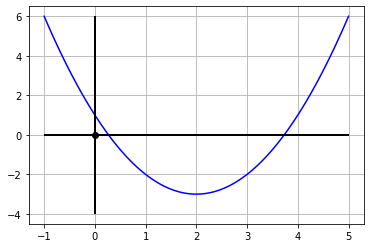

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from sympy import *

x = symbols('x')

def func(x):
  return x**2-4*x+1

x = np.linspace(-1, 5, 100)  #0から2πまでの範囲を100分割したnumpy配列
y = func(x)
plt.plot(x, y, color = 'b')

plt.plot(0, 0, "o", color = 'k')
# plot([x1, x2], [y1, y2], color='k', linestyle='-', linewidth=2)
plt.hlines(0, -1, 5, color='k', linestyle='-', linewidth=2)
plt.vlines(0, -4, 6, color='k', linestyle='-', linewidth=2)
plt.grid()
plt.show()

もし，解析解が容易に求まるなら，その結果を使うほうがよい．
pythonの解析解を求めるsolveは，sympyから呼び出して，

In [2]:
from sympy import *

x = symbols('x')

def func(x):
  return x**2-4*x+1

pprint(solve(func(x), x))

[2 - √3, √3 + 2]


と即座に求めてくれる．数値解は以下の通り求められる．
コメントを外してみてください．ちょっと注意が必要ということがわかるでしょうか？

In [3]:
from scipy.optimize import fsolve
def func(x):
  return x**2-4*x+1

pprint(fsolve(func, 0))
pprint(fsolve(func, 2.0))
pprint(fsolve(func, [0, 5]))
pprint(fsolve(func, [0, 0.8]))

[0.26794919]
[2.01500001]
[0.26794919 3.73205081]
[0.26794919 0.26794919]


# 二分法とNewton法の原理


## 二分法(bisection) 


二分法は領域の端$x_1, x_2$で関数値$f(x_1),f(x_2)$を求め，中間の値を次々に計算して，解を囲い込んでいく方法である．

|$x_1$ | $x_2$ |$f(x_1)$ | $f(x_2)$  |
|:----|:----|:----|:----|
|0.0 | 0.8 |　　　　　 |　　　　　  |
|　　　　|  　　　　|  　　　　| 　　　　 |
|　　　　|  　　　　|  　　　　| 　　　　 |
|　　　　|  　　　　|  　　　　| 　　　　 |


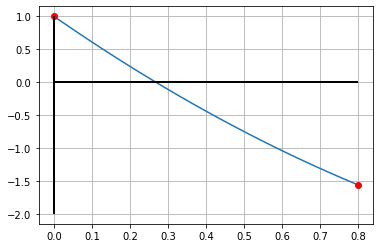

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def func(x):
    return x**2-4*x+1

x = np.linspace(0, 0.8, 100)  #0から2πまでの範囲を100分割したnumpy配列
y = func(x)
plt.plot(x, y)

plt.plot(0, func(0), "o", color = 'r')
plt.plot(0.8, func(0.8), "o", color = 'r')
# plot([x1, x2], [y1, y2], color='k', linestyle='-', linewidth=2)
plt.hlines(0, 0, 0.8, color='k', linestyle='-', linewidth=2)
plt.vlines(0, -2, 1, color='k', linestyle='-', linewidth=2)
plt.grid()
plt.show()

## Newton法(あるいはNewton-Raphson法) 


Newton法は最初の点$x_1$から接線をひき，それが$x$軸(y=0)と交わった点を新たな点$x_2$とする．さらにそこでの接線を求めて...

という操作を繰り返しながら解を求める方法である．関数の微分をdf(x)とすると，これらの間には

|　　　$x_{i+1} = x_i + \ldots$　　　|
|:----|
|　　　　　　　|
という関係が成り立つ．


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

x = symbols('x')

def func(x):
    return x**2-4*x+1

def df(x):
    return diff(func(x), x)

pprint(df(x))

x1 = 1.0
df(x).subs(x, x1)*(x-x1)+func(x1)

def line_f(x, x1):
    return df(x).subs(x, x1)*(x-x1)+func(x1)


pprint(line_f(x, 1.0))
x0 = 0.0
x1 = 1.0

y0 = line_f(x, x1).subs(x, x0)
y1 = line_f(x, x1).subs(x, x1)
print(y0, y1)

yy0 = line_f(x, x0).subs(x, x0)
yy1 = line_f(x, x0).subs(x, x1)
print(yy0, yy1)

2⋅x - 4
-2.0⋅x
0 -2.00000000000000
1.00000000000000 -3.00000000000000


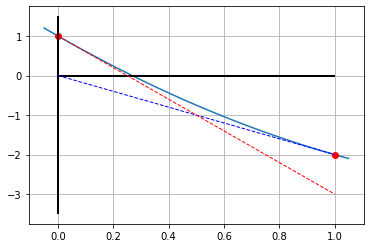

In [6]:
x = np.linspace(x0-0.05, x1+0.05, 100)
y = func(x)
plt.plot(x, y)

plt.plot(x0, func(x0), "o", color = 'r')
plt.plot(x1, func(x1), "o", color = 'r')
# plot([x1, x2], [y1, y2], color='k', linestyle='-', linewidth=2)
plt.hlines(0, x0, x1, color='k', linestyle='-', linewidth=2)
plt.vlines(0, -3.5,1.5, color='k', linestyle='-', linewidth=2)

plt.plot([x0, x1], [y0, y1], color='b', linestyle='--', linewidth=1)
plt.plot([x0, x1], [yy0, yy1], color='r', linestyle='--', linewidth=1)

plt.grid()

plt.show()



|$x_1$ |$f(x_1)$ | $df(x_1)$  |
|:----|:----|:----|
|1.0　| 　　　　 | 　　　　  |
|　　　　　　　| 　　　　　　　 | 　　　　　　　  |
|　　　　　　　| 　　　　　　　 | 　　　　　　　  |
|　　　　　　　| 　　　　　　　 | 　　　　　　　  |



# 二分法とNewton法のコード


## 二分法(bisection) 


In [7]:
x1, x2 = 0.0, 0.8
f1, f2 = func(x1), func(x2)
print('%-6s %-6s %-6s %-6s'  % ('x1','x2','f1','f2'))
print('%-6.3f %-6.3f %-6.3f %-6.3f' % (x1,x2,f1,f2))
for i in range(0, 5):
    x = (x1 + x2)/2
    f = func(x)
    if (f*f1>=0.0):
        x1, f1 = x, f
    else:
        x2, f2 = x, f
    print('%-6.3f %-6.3f %-6.3f %-6.3f' % (x1,x2,f1,f2))

x1     x2     f1     f2    
0.000  0.800  1.000  -1.560
0.000  0.400  1.000  -0.440
0.200  0.400  0.240  -0.440
0.200  0.300  0.240  -0.110
0.250  0.300  0.062  -0.110
0.250  0.275  0.062  -0.024


## Newton法(あるいはNewton-Raphson法) 


In [8]:
import matplotlib.pyplot as plt
import numpy as np
#from sympy import *

#x = symbols('x')
def func(x):
    return x**2-4*x+1
def df(x):
    return 2*x - 4

In [9]:
epsilon = 10**(-10)
x1 = 1.0
f1 = func(x1)
print('%-15.10f %-24.25f' % (x1,f1))
for i in range(0, 5):
    x1 = x1 - f1 / df(x1)
    f1 =func(x1)
    print('%-15.10f %-24.25f' % (x1,f1))


1.0000000000    -2.0000000000000000000000000
0.0000000000    1.0000000000000000000000000
0.2500000000    0.0625000000000000000000000
0.2678571429    0.0003188775510204466812070
0.2679491900    0.0000000084726737847873324
0.2679491924    0.0000000000000000000000000


# 収束性と安定性


実際のコードの出力からも分かる通り，解の収束の速さは2つの手法で極端に違う．2分法では一回の操作で解の区間が半分になる．このように繰り返しごとに誤差幅が前回の誤差幅の定数($<1$)倍になる方法は1次収束(linear convergence)するという．Newton法では関数・初期値が素直な場合($f^{\prime}(x) <> 0$)に，収束が誤差の2乗に比例する2次収束を示す．以下はその導出をMapleで示した．


```maple
> restart; ff:=subs(xi-x[f]=ei,series(f(xi),xi=x[f],4));
```

$$
{\it ff}\, := \,f \left( x_{{f}} \right) +D \left( f \right)  \left( x_{{f}} \right) {\it ei}+\frac{1}{2}\,  D^{ \left( 2 \right) }   \left( f \right)  \left( x_{{f}} \right) {{\it ei}}^{2} +\frac{1}{6}\, 
D^{ \left( 3 \right) }   \left( f \right)  \left( x_{{f}} \right) {{\it ei}}^{3}+O \left( {{\it ei}}^{4} \right)
$$
```maple
> dff:=subs({0=x[f],x=ei},series(diff(f(x),x),x,3));
```
$$
{\it dff}\, := \,D \left( f \right)  \left( x_{{f}} \right) + 
D^{ \left( 2 \right) } \left( f \right)  \left( x_{{f}} \right) {\it ei}+
\frac{1}{2}\, D^{ \left( 3 \right) } \left( f \right)  \left( x_{{f}} \right) {{\it ei}}^{2} +O \left( {{\it ei}}^{3} \right)
$$
```maple
> ei1:=ei-ff/dff;
```
$$
{\it ei1}\, := \,{\it ei}-{\frac {f \left( x_{{f}} \right) +D \left( f \right)  \left( x_{{f}} \right) {\it ei}+\frac{1}{2}\,  D^{ \left( 2 \right) }  \left( f \right)  \left( x_{{f}} \right) {{\it ei}}^{2}+\frac{1}{6}\,  D^{ \left( 3 \right) }   \left( f \right)  \left( x_{{f}} \right) {{\it ei}}^{3}+O \left( {{\it ei}}^{4} \right) }{D \left( f \right)  \left( x_{{f}} \right) +  D^{ \left( 2 \right) }  \left( f \right)  \left( x_{{f}} \right) {\it ei} +\frac{1}{2}\, D^{ \left( 3 \right) } \left( f \right)  \left( x_{{f}} \right) {{\it ei}}^{2}+O \left( {{\it ei}}^{3} \right) }}
$$
```maple
> ei2:=simplify(convert(ei1,polynom));
```
$$
{\it ei2}\, := \,\frac{1}{3}\,\frac {3\, D^{ \left( 2 \right) }  \left( f \right)  \left( x_{{f}} \right) {{\it ei}}^{2}+2\, D^{ \left( 3 \right) } \left( f \right)  \left( x_{{f}} \right) {{\it ei}}^{3}
-6\,f \left( x_{{f}} \right) }{2\,D \left( f \right)  \left( x_{{f}} \right) +2\, D^{ \left( 2 \right) }   \left( f \right)  \left( x_{{f}} \right) {\it ei}+ D^{ \left( 3 \right) } \left( f \right)  \left( x_{{f}} \right) {{\it ei}}^{2}
}
$$
```maple
> ei3:=series(ei2,ei,3);
```
$$
{\it ei3}\, := \,-{\frac {f \left( x_{{f}} \right) }{D \left( f \right)  \left( x_{{f}} \right) }}+{\frac {f \left( x_{{f}} \right)  \left( D^{ \left( 2 \right) } \right)  \left( f \right)  \left( x_{{f}} \right) {\it ei}}{ \left( D \left( f \right)  \left( x_{{f}} \right)  \right) ^{2}}}+  \\
\frac{1}{6}\, \frac{ 3\, \left( D^{ \left( 2 \right) } \right)  \left( f \right)  \left( x_{{f}} \right) +3\,{\frac {f \left( x_{{f}} \right)  \left( D^{ \left( 3 \right) } \right)  \left( f \right)  \left( x_{{f}} \right) }{D \left( f \right)  \left( x_{{f}} \right) }}-6\,{\frac {f \left( x_{{f}} \right)  \left(  \left( D^{ \left( 2 \right) } \right)  \left( f \right)  \left( x_{{f}} \right)  \right) ^{2}}{ \left( D \left( f \right)  \left( x_{{f}} \right)  \right) ^{2}}}}
{ \left( D \left( f \right)  \left( x_{{f}} \right)  \right)}{{\it ei}}^{2} +O \left( {{\it ei}}^{3} \right)
$$
```maple
> subs(f(x[f])=0,ei3);
```
$$
\frac{1}{2}\,{\frac {  D^{ \left( 2 \right) }   \left( f \right)  \left( x_{{f}} \right) {{\it ei}}^{2}}{D \left( f \right)  \left( x_{{f}} \right) }}+O \left( {{\it ei}}^{3} \right)
$$
注意すべきは，この収束性には一回の計算時間の差は入っていないことである．Newton法で解析的に微分が求まらない場合，数値的に求めるという手法がとられるが，これにかかる計算時間はばかにできない．二分法を改良した割線法(secant method)がより速い場合がある(NumRecipe9章参照)．

二分法では，収束は遅いが，正負の関数値の間に連続関数では必ず解が存在するという意味で解が保証されている．しかし，Newton法では，収束は速いが，必ずしも素直に解に収束するとは限らない．解を確実に囲い込む，あるいは解に近い値を初期値に選ぶ手法が種々考案されている．解が安定であるかどうかは，問題，解法，初期値に大きく依存する．収束性と安定性のコントロールが数値計算のツボとなる．





# 収束判定条件



どこまで値が解に近づけば計算を打ち切るかを決める条件を収束判定条件と呼ぶ．以下のような条件がある．


|手法|判定条件|解説
|:----|:----|:----|
|$\varepsilon$(イプシロン，epsilon)法 |　|
|$\delta$(デルタ，delta)法 | |
|占部法 | $ \left| f(x_{i+1})\right| > \left| f(x_i)\right| $ | 数値計算の際の丸め誤差までも含めて判定する条件
 

#### $\epsilon, \delta$を説明するための図 


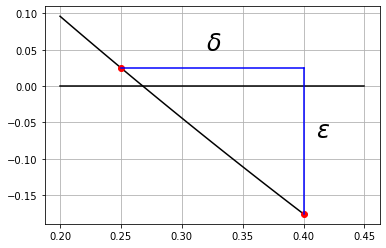

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def func(x):
    return 0.4*(x**2-4*x+1)
x1=0.25
x0=0.4
x = np.linspace(0.2, 0.4, 100)
y = func(x)
plt.plot(x, y, color = 'k')
plt.plot(x1, func(x1), "o", color = 'r')
plt.plot(x0, func(x0), "o", color = 'r')
plt.plot([0.2,0.45],[0,0], color = 'k')
plt.plot([x1,x0],[func(x1),func(x1)], color = 'b')
plt.plot([x0,x0],[func(x0),func(x1)], color = 'b')

plt.text(0.41, -0.07, r'$\epsilon$', size='24') 
plt.text(0.32, 0.05, r'$\delta$', size='24') 


plt.grid()
plt.show()

In [11]:
import matplotlib.pyplot as plt
import numpy as np
#from sympy import *

#x = symbols('x')
def func(x):
    return x**2-4*x+1
def df(x):
    return 2*x - 4

In [12]:
epsilon = 10**(-10)
x1 = 1.0
f1 = func(x1)
print('%-15.10f %-24.25f' % (x1,f1))
for i in range(0, 20):
    x2 = x1 - f1 / df(x1)
    f2 =func(x2)
    print('%-15.10f %-24.25f' % (x1,f1))
    if abs(f2-f1)<epsilon: # absolute(絶対値)
        break
    else:
        x1 = x2
        f1 = f2

1.0000000000    -2.0000000000000000000000000
1.0000000000    -2.0000000000000000000000000
0.0000000000    1.0000000000000000000000000
0.2500000000    0.0625000000000000000000000
0.2678571429    0.0003188775510204466812070
0.2679491900    0.0000000084726737847873324
0.2679491924    0.0000000000000000000000000


# 2変数関数の場合



2変数の関数では，解を求める一般的な手法は無い．この様子は実際に2変数の関数で構成される面の様子をみれば納得されよう．
```maple
> restart;
> f:=(x,y)->4*x+2*y-6*x*y; g:=(x,y)->10*x-2*y+1;
```
$$
f\, := \,( {x,y} )\mapsto 4\,x+2\,y-6\,xy  \\
g\, := \,( {x,y} )\mapsto 10\,x-2\,y+1 
$$
```maple
> p1:=plot3d({f(x,y)},x=-2..2,y=-2..2,color=red):
  p2:=plot3d({g(x,y)},x=-2..2,y=-2..2,color=blue):
  p3:=plot3d({0},x=-2..2,y=-2..2,color=gray):
  with(plots):
  display([p1,p2,p3],axes=boxed,orientation=[-150,70]);
```


解のある程度近くからは，Newton法で効率良く求められる．
```maple
> fsolve({f(x,y)=0,g(x,y)=0},{x,y});
```
$$
\left\{ x=- 0.07540291160,y= 0.1229854420 \right\}
$$




<ipython-input-13-4dec0d75cda3>:21: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  plot3d = Axes3D(fig)


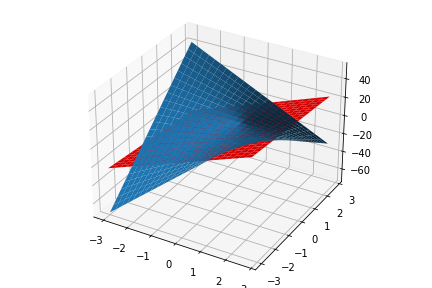

In [13]:
%matplotlib notebook


import ipympl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def f(x,y):
    return 4*x+2*y-6*x*y
def g(x,y):
    return 10*x-2*y+1

x = np.arange(-3, 3, 0.25)
y = np.arange(-3, 3, 0.25)
X, Y = np.meshgrid(x, y)
Z1 = f(X,Y)
Z2 = g(X,Y)

fig = plt.figure()
plot3d = Axes3D(fig)
plot3d.plot_surface(X,Y,Z1) 
plot3d.plot_surface(X,Y,Z2, color='r') 

plt.show()

# 2020年度課題(中筋さんありがとう)

1. 次に示した「例題:二分法とNewton法の収束性」および「解答例」をコピペして，pythonが動作することを確認せよ．

1. 対象の関数を $f(x) = \exp(-x)-2\exp(-2x)$ として解答せよ．
提出は2.だけでよい．

ただし，func, dfuncは以下を使え．下の「exp関数に関する注意」参照

In [14]:
def func(x):
    return np.exp(-x)-2*np.exp(-2*x)

def df(x):
    return -np.exp(-x) + 4*np.exp(-2*x)

# 例題:二分法とNewton法の収束性



代数方程式に関する次の課題に答えよ．(2004年度期末試験)
1.  $\exp(-x) = x^2$を二分法およびニュートン法で解け.
1.  $n$回目の値$x_n$と小数点以下10桁まで求めた値$x_f=0.7034674225$との差$\Delta x_n$の絶対値(abs)のlogを$n$の関数としてプロットし，その収束性を比較せよ．また，その傾きの違いを両解法の原理から説明せよ.




### 解答例 


+ funcで関数を定義．
+ 関数をplotして概形を確認．
+ 組み込みコマンドで正解を確認しておく．
$$
0.7034674224983916520498186018599021303429
$$
テキストからプログラムをコピーして走らせてみる．環境によっては，printf分の中の"\"が文字化けしているので，その場合は修正して使用せよ．

+ プロットのためにリストをlist_bisecで作成している．
+ 同様にNewton法での結果をlist_newtonに入れる．
+ list_bisec, list_newtonを片対数プロットして同時に表示．

2分法で求めた解は，Newton法で求めた解よりもゆっくりと精密解へ収束している．これは，二分法が原理的に計算回数について一次収束なのに対して，Newton法は2次収束であるためである．解の差($\delta$)だけでなく，関数値$f(x),\epsilon$をとっても同様の振る舞いを示す．




In [15]:
import matplotlib.pyplot as plt
import numpy as np

from sympy import *

x = symbols('x')


def func(x):
    return exp(-x)-x**2

def df(x):
    return diff(func(x), x)

print(df(x))


-2*x - exp(-x)


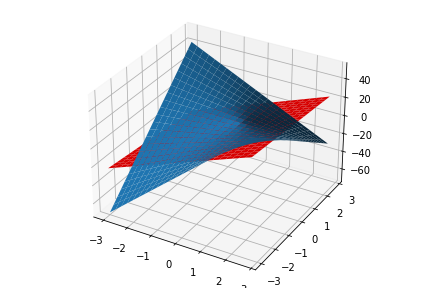

In [16]:
def func(x):
    return  np.exp(-x)-x**2
def df(x):
    return  -2*x - np.exp(-x)

x0=0.0
x1=1.0
x = np.linspace(x0, x1, 100)
y = func(x)
plt.plot(x, y, color = 'k')
plt.plot([x0,x1],[0,0])
plt.grid()
plt.show()

In [17]:
from scipy.optimize import fsolve
x0 = fsolve(func, 0.0)[0]
x0

0.7034674224983918

In [18]:
x1, x2 = 0.0, 1.0
f1, f2 = func(x1), func(x2)
print('%+15s %+15s %+15s %+15s'  % ('x1','x2','f1','f2'))
print('%+15.10f %+15.10f %+15.10f %+15.10f' % (x1,x2,f1,f2))

list_bisec = [[0],[abs(x1-x0)]]
for i in range(0, 20):
    x = (x1 + x2)/2
    f = func(x)
    if (f*f1>=0.0):
        x1, f1 = x, f
        list_bisec[0].append(i)
        list_bisec[1].append(abs(x1-x0))
    else:
        x2, f2 = x, f
        list_bisec[0].append(i)
        list_bisec[1].append(abs(x2-x0))

    print('%+15.10f %+15.10f %+15.10f %+15.10f' % (x1,x2,f1,f2))

list_bisec
print()

             x1              x2              f1              f2
  +0.0000000000   +1.0000000000   +1.0000000000   -0.6321205588
  +0.5000000000   +1.0000000000   +0.3565306597   -0.6321205588
  +0.5000000000   +0.7500000000   +0.3565306597   -0.0901334473
  +0.6250000000   +0.7500000000   +0.1446364285   -0.0901334473
  +0.6875000000   +0.7500000000   +0.0301753280   -0.0901334473
  +0.6875000000   +0.7187500000   +0.0301753280   -0.0292404858
  +0.7031250000   +0.7187500000   +0.0006511313   -0.0292404858
  +0.7031250000   +0.7109375000   +0.0006511313   -0.0142486319
  +0.7031250000   +0.7070312500   +0.0006511313   -0.0067872536
  +0.7031250000   +0.7050781250   +0.0006511313   -0.0030651888
  +0.7031250000   +0.7041015625   +0.0006511313   -0.0012063109
  +0.7031250000   +0.7036132812   +0.0006511313   -0.0002774104
  +0.7033691406   +0.7036132812   +0.0001869053   -0.0002774104
  +0.7033691406   +0.7034912109   +0.0001869053   -0.0000452413
  +0.7034301758   +0.7034912109   +0.000

In [19]:
df(-1.0)

-0.7182818284590451

In [20]:
x1 = 1.0
f1 = func(x1)
list_newton = [[0],[x1]]
print('%-15.10f %+24.25f' % (x1,f1))
for i in range(0, 4):
    x1 = x1 - f1 / df(x1)
    f1 =func(x1)
    print('%-15.10f %+24.25f' % (x1,f1))
    list_newton[0].append(i)
    list_newton[1].append(abs(x1-x0))

list_newton
print()

1.0000000000    -0.6321205588285576659757226
0.7330436052    -0.0569084480040253914978621
0.7038077863    -0.0006473915387465445370196
0.7034674683    -0.0000000871660306156485376
0.7034674225    -0.0000000000000014988010832



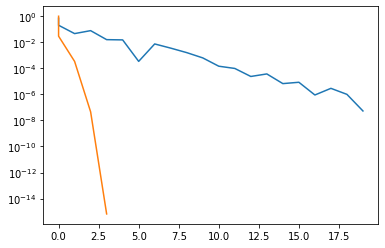

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

X = list_bisec[0]
Y = list_bisec[1]
plt.plot(X, Y)

X = list_newton[0]
Y = list_newton[1]
plt.plot(X, Y)

plt.yscale("log") # y軸を対数目盛に
plt.show()

## exp関数に関する注意
exp関数のimport元で振る舞いが違うみたい．
```python
ValueError: sequence too large; cannot be greater than 32
```
がplot作成の前段階で出る．
numpyでやるときには，np.exp(-x)などとしてる．

でも，diffには通らない．そのあたり，覚悟して使う関数を決めないと．．．